# Logestic Regression
### Author: Ehsan Gharib-Nezhad



In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# # Imbalance data Handling ___________________________________________________
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter

from myfunctions import *

In [7]:
df = pd.read_csv('../datasets/text_processed_all_posts_combined_imbalanced.csv',index_col=0)
is_balanced = False # set True is the dataset is balanced!!! 

In [70]:
# df[['post','token']].head(50)

### Set up X and Y

In [9]:
X = df['token']
y = df['is_Covid19positive']

In [10]:
#check baseline:

y.value_counts(normalize = True)

1    0.929286
0    0.070714
Name: is_Covid19positive, dtype: float64

### train test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y, 
                                                    random_state = 42)

In [12]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(1    0.929273
 0    0.070727
 Name: is_Covid19positive, dtype: float64,
 1    0.929322
 0    0.070678
 Name: is_Covid19positive, dtype: float64)

# ======================================================

## Use count vectorizer

In [13]:
cvec = CountVectorizer()

In [14]:
Xcv_train = cvec.fit_transform(X_train)
Xcv_test  = cvec.transform(X_test)

## For imbalanced case

In [15]:
ros = RandomOverSampler()

Xcv_train , y_train = ros.fit_resample(Xcv_train, y_train)

# Logreg / Regulization = L2 (Ridge)

In [16]:
logreg_l2 = LogisticRegression(random_state = 42)

In [17]:
logreg_l2.fit(Xcv_train, y_train)

LogisticRegression(random_state=42)

In [18]:
# accuracy
logreg_l2.score(Xcv_train, y_train), logreg_l2.score(Xcv_test, y_test)

(0.9946038488210819, 0.9670170351576658)

# Plot Feature Coefficient

In [19]:
#create a dataframe for our X_train_cv to use later:

df_X_train = pd.DataFrame(Xcv_train.todense(), columns=cvec.get_feature_names())

In [20]:
df_X_train

,aa,aaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaachooooooo,aaaand,aaargh,ab,aback,abain,abandon,...,zpak,zucchini,zuchinni,zuckersaid,zuid,zurich,zybio,zyrtec,zz,zzzquil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
f = {'Feature Name':df_X_train.columns,'Feature Coefficient':logreg_l2.coef_[0]}
fi = pd.DataFrame(f)

fi.sort_values(by=['Feature Coefficient'], ascending = False).head(20)

,Feature Name,Feature Coefficient
13187,posit,3.097128
3646,contract,2.119190
16838,symptom,2.085405
6333,finger,2.029962
3864,covid,1.874277
14993,scare,1.848178
19414,woke,1.794876
18692,vax,1.784630
14109,recov,1.743909
18865,visit,1.725797


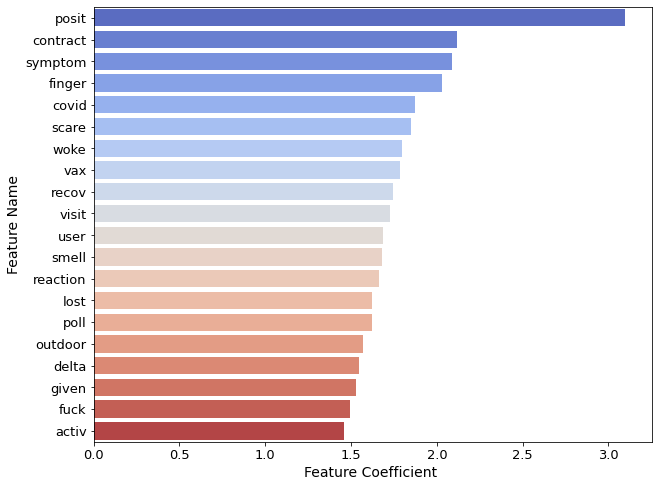

In [22]:
plt.figure( figsize=(10,8))
sns.barplot(x='Feature Coefficient',y='Feature Name', 
            data=fi.sort_values(by='Feature Coefficient', ascending=False).iloc[0:20],
            palette='coolwarm')
plt.xlabel('Feature Coefficient ',fontsize=14)
plt.ylabel('Feature Name', fontsize = 14)
plt.tick_params('both', labelsize = 13)

# Confusion Matrix

Score on training set: 0.9946038488210819
Score on testing set: 0.9670170351576658
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       585
           1       0.99      0.98      0.98      7692

    accuracy                           0.97      8277
   macro avg       0.86      0.91      0.88      8277
weighted avg       0.97      0.97      0.97      8277



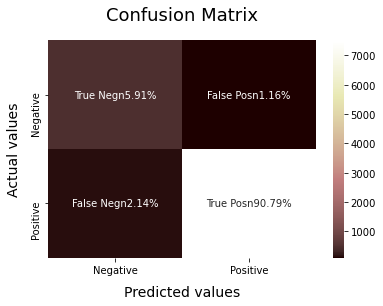

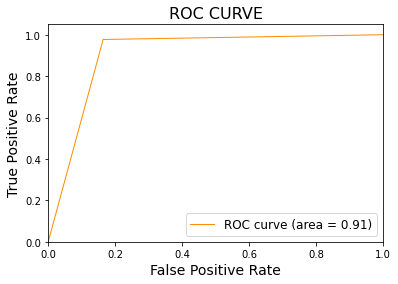

In [23]:
# View confusion matrix
model_Evaluate(logreg_l2, Xcv_train, Xcv_test, y_train, y_test)

In [24]:
def model_Evaluate_values(model, x_train, x_test, y_train, y_test, model_name, balanced=True):
    """
    """
    # Print accuracy scores on train and test sets
    R_train = model.score(x_train, y_train)
    R_test  = model.score(x_test, y_test)
    df_accuracy = pd.DataFrame( np.round( [R_train, R_test], 2 ),  columns=['score'])
    
    df_accuracy['metric'] = ['R_train' , 'R_test']
    df_accuracy['model'] = model_name
    if balanced == True:
        df_accuracy['balanced'] = 'yes'
    if balanced == False:
        df_accuracy['balanced'] = 'no'
        
    # Predict values for Test dataset
    y_pred = model.predict(x_test)
    scores = precision_recall_fscore_support(y_test, model.predict(x_test))
    df_precision_recall = pd.DataFrame( np.round(scores, 2) , columns=['is_pandemicPreps', 'is_covid19positive'] )
    df_precision_recall['metric'] = ['precision' , 'recall' , 'fscore' , 'support']
    df_precision_recall['model'] = model_name
    if balanced == True:
        df_precision_recall['balanced'] = 'yes'
    if balanced == False:
        df_precision_recall['balanced'] = 'no'

    
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = [np.round(value, 2) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    df_cf_matrix = pd.DataFrame( group_percentages ,  columns=['score'] )
    df_cf_matrix['metric'] = group_names
    df_cf_matrix['model'] = model_name
    if balanced == True:
        df_cf_matrix['balanced'] = 'yes'
    if balanced == False:
        df_cf_matrix['balanced'] = 'no'
        
    # save_______________________________
    # if file is not there
#     pd.DataFrame(df_accuracy).to_csv('../datasets/models_metrics_report_accuracy.csv')
#     pd.DataFrame(df_cf_matrix).to_csv('../datasets/models_metrics_report_confusionMatrix.csv')
#     pd.DataFrame(df_precision_recall).to_csv('../datasets/models_metrics_report_precision_recall.csv')
    # accuracy - 1
    df1 = pd.read_csv('../datasets/models_metrics_report_accuracy.csv', index_col=0)
    df2 = df_accuracy
    pd.concat([df1,df2],ignore_index=True).to_csv('../datasets/models_metrics_report_accuracy.csv')
    # accuracy - 0
    df1 = pd.read_csv('../datasets/models_metrics_report_precision_recall.csv', index_col=0)
    df2 = df_precision_recall
    pd.concat([df1,df2],ignore_index=True).to_csv('../datasets/models_metrics_report_precision_recall.csv')
    # accuracy - 2
    df1 = pd.read_csv('../datasets/models_metrics_report_confusionMatrix.csv', index_col=0)
    df2 = df_cf_matrix
    pd.concat([df1,df2],ignore_index=True).to_csv('../datasets/models_metrics_report_confusionMatrix.csv')
    
    #     print(classification_report(y_test, y_pred))
    return df_accuracy, df_precision_recall, df_cf_matrix

In [20]:
save_model_Evaluate_values(logreg_l2, Xcv_train, Xcv_test, y_train, y_test,  
                             model_name='Logestic  Regression / L2', balanced=is_balanced)

(   score   metric                      model balanced
 0   1.00  R_train  Logestic  Regression / L2       no
 1   0.97   R_test  Logestic  Regression / L2       no,
    is_pandemicPreps  is_covid19positive     metric                      model  \
 0              0.73                0.99  precision  Logestic  Regression / L2   
 1              0.84                0.98     recall  Logestic  Regression / L2   
 2              0.78                0.98     fscore  Logestic  Regression / L2   
 3            585.00             7692.00    support  Logestic  Regression / L2   
 
   balanced  
 0       no  
 1       no  
 2       no  
 3       no  ,
    score     metric                      model balanced
 0   0.06   True Neg  Logestic  Regression / L2       no
 1   0.01  False Pos  Logestic  Regression / L2       no
 2   0.02  False Neg  Logestic  Regression / L2       no
 3   0.91   True Pos  Logestic  Regression / L2       no)

# ===============================================

# Logistic Regression / Regulization = L1 (Lasso)

In [22]:
logreg_l1 = LogisticRegression(penalty='l1', solver='saga', random_state = 42)

logreg_l1.fit(Xcv_train, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='saga')

In [23]:
logreg_l1.score(Xcv_train, y_train), logreg_l1.score(Xcv_test, y_test)

(0.9590412621359223, 0.9505859610970159)

# Plot Feature Coefficient

In [24]:
#create a dataframe for our X_train_cv to use later:

df_X_train = pd.DataFrame(Xcv_train.todense(), columns=cvec.get_feature_names())

In [25]:
f = {'Feature Name':df_X_train.columns,'Feature Coefficient':logreg_l1.coef_[0]}
fi = pd.DataFrame(f)

fi.sort_values(by=['Feature Coefficient'], ascending = False).head(20)

,Feature Name,Feature Coefficient
13187,posit,1.037438
16838,symptom,0.953719
3864,covid,0.887174
17199,test,0.593760
15741,smell,0.590821
17010,tast,0.574714
4248,day,0.524479
6186,feel,0.440740
14109,recov,0.403447
3790,cough,0.378037


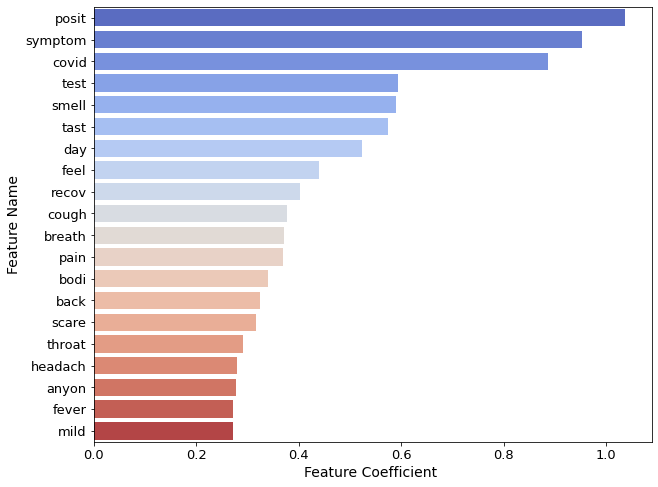

In [26]:
plt.figure( figsize=(10,8))
sns.barplot(x='Feature Coefficient',y='Feature Name', 
            data=fi.sort_values(by='Feature Coefficient', ascending=False).iloc[0:20],
            palette='coolwarm')
plt.xlabel('Feature Coefficient ',fontsize=14)
plt.ylabel('Feature Name', fontsize = 14)
plt.tick_params('both', labelsize = 13)

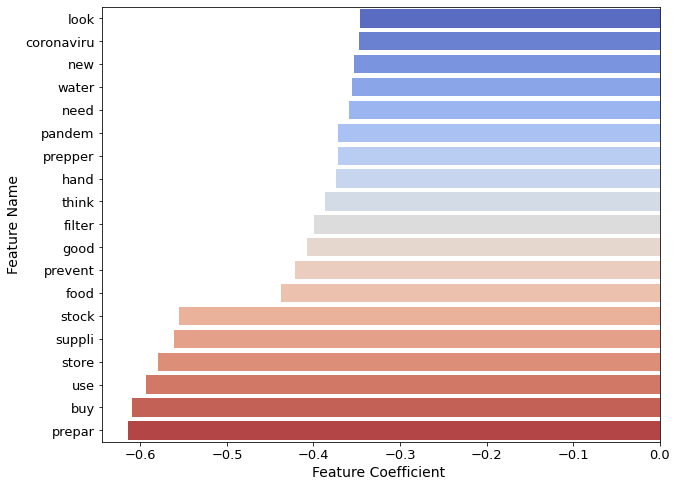

In [27]:
plt.figure( figsize=(10,8))
sns.barplot(x='Feature Coefficient',y='Feature Name', 
            data=fi.sort_values(by='Feature Coefficient', ascending=False).iloc[-20:-1],
            palette='coolwarm')
plt.xlabel('Feature Coefficient ',fontsize=14)
plt.ylabel('Feature Name', fontsize = 14)
plt.tick_params('both', labelsize = 13)

# Confusion Matrix

Score on training set: 0.9590412621359223
Score on testing set: 0.9505859610970159
              precision    recall  f1-score   support

           0       0.60      0.93      0.73       585
           1       0.99      0.95      0.97      7692

    accuracy                           0.95      8277
   macro avg       0.80      0.94      0.85      8277
weighted avg       0.97      0.95      0.96      8277



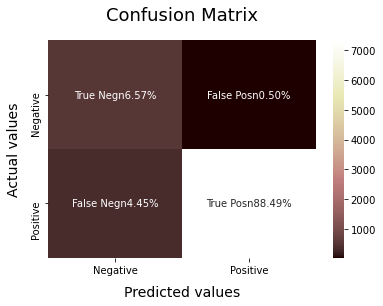

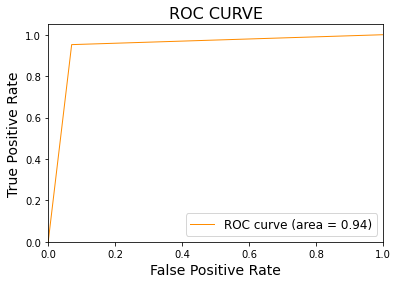

In [28]:
model_Evaluate(logreg_l1, Xcv_train, Xcv_test, y_train, y_test)

In [29]:
save_model_Evaluate_values(logreg_l1, Xcv_train, Xcv_test, y_train, y_test,  
                             model_name='Logestic  Regression / L1', balanced = is_balanced)

(   score   metric                      model balanced
 0   0.96  R_train  Logestic  Regression / L1       no
 1   0.95   R_test  Logestic  Regression / L1       no,
    is_pandemicPreps  is_covid19positive     metric                      model  \
 0              0.60                0.99  precision  Logestic  Regression / L1   
 1              0.93                0.95     recall  Logestic  Regression / L1   
 2              0.73                0.97     fscore  Logestic  Regression / L1   
 3            585.00             7692.00    support  Logestic  Regression / L1   
 
   balanced  
 0       no  
 1       no  
 2       no  
 3       no  ,
    score     metric                      model balanced
 0   0.07   True Neg  Logestic  Regression / L1       no
 1   0.00  False Pos  Logestic  Regression / L1       no
 2   0.04  False Neg  Logestic  Regression / L1       no
 3   0.88   True Pos  Logestic  Regression / L1       no)

# ======================================================

# Gridsearch

In [40]:
# Define dictionary of hyperparameters.
pipe_params = {'penalty': ['l2'], 
                 'C': [50,60,65,70,75,80,85,90,100],
                 'class_weight' : ['balanced'],
                  'solver': ['lbfgs']}

In [41]:
gs = GridSearchCV(LogisticRegression(random_state=42), pipe_params, cv = 5)

In [42]:
gs.fit(Xcv_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [50, 60, 65, 70, 75, 80, 85, 90, 100],
                         'class_weight': ['balanced'], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [43]:
gs.score(Xcv_train, y_train), gs.score(Xcv_test, y_test)

(0.9983313106796117, 0.9655672345052555)

In [44]:
gs.best_params_

{'C': 85, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

# Confusion Matrix

Score on training set: 0.9983313106796117
Score on testing set: 0.9655672345052555
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       585
           1       0.98      0.98      0.98      7692

    accuracy                           0.97      8277
   macro avg       0.86      0.88      0.87      8277
weighted avg       0.97      0.97      0.97      8277



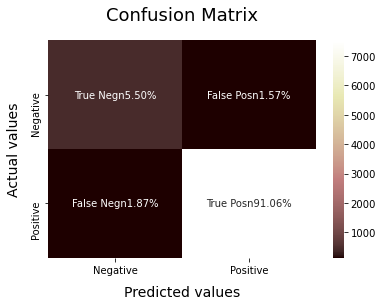

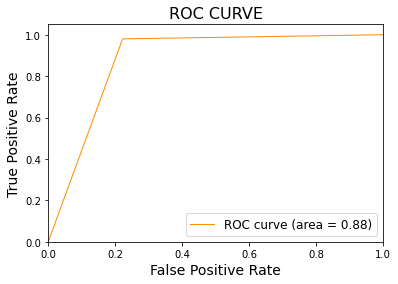

In [45]:
model_Evaluate(gs, Xcv_train, Xcv_test, y_train, y_test)

In [46]:
save_model_Evaluate_values(gs, Xcv_train, Xcv_test, y_train, y_test,  
                             model_name='Logestic  Regression / Full-GridSearchCV', balanced=is_balanced)

(   score   metric                                     model balanced
 0   1.00  R_train  Logestic  Regression / Full-GridSearchCV       no
 1   0.97   R_test  Logestic  Regression / Full-GridSearchCV       no,
    is_pandemicPreps  is_covid19positive     metric  \
 0              0.75                0.98  precision   
 1              0.78                0.98     recall   
 2              0.76                0.98     fscore   
 3            585.00             7692.00    support   
 
                                       model balanced  
 0  Logestic  Regression / Full-GridSearchCV       no  
 1  Logestic  Regression / Full-GridSearchCV       no  
 2  Logestic  Regression / Full-GridSearchCV       no  
 3  Logestic  Regression / Full-GridSearchCV       no  ,
    score     metric                                     model balanced
 0   0.05   True Neg  Logestic  Regression / Full-GridSearchCV       no
 1   0.02  False Pos  Logestic  Regression / Full-GridSearchCV       no
 2   0.02  Fals

In [51]:
f = {'Feature Name':df_X_train.columns,'Feature Coefficient':gs.best_estimator_.coef_[0]}
fi = pd.DataFrame(f)

fi.sort_values(by=['Feature Coefficient'], ascending = False).head(20)

,Feature Name,Feature Coefficient
13187,posit,9.887254
13998,reaction,8.655816
1637,benefici,7.969067
3646,contract,7.124032
6333,finger,7.021088
18566,user,6.933293
13170,portabl,6.754591
18692,vax,6.750351
12679,perform,6.741162
4330,deceiv,6.735579


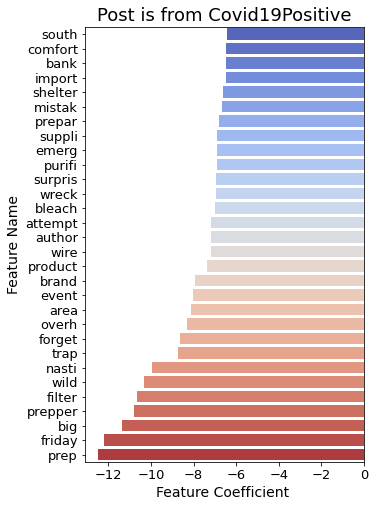

In [59]:
plt.figure( figsize=(5,8))
plt.title('Post is from Covid19Positive', fontsize=18)
sns.barplot(x='Feature Coefficient',y='Feature Name', 
            data=fi.sort_values(by='Feature Coefficient', ascending=False).iloc[-30::],
            palette='coolwarm')
plt.xlabel('Feature Coefficient ',fontsize=14)
plt.ylabel('Feature Name', fontsize = 14)
plt.tick_params('both', labelsize = 13)

In [426]:
# pd.DataFrame(score[1]).to_csv('../datasets/models_metrics_report_accuracy.csv')
# pd.DataFrame(score[2]).to_csv('../datasets/models_metrics_report_confusionMatrix.csv')
# pd.DataFrame(score[0]).to_csv('../datasets/models_metrics_report_precision_recall.csv')

In [495]:
# score = [pd.concat([score1[i], score2[i]], ignore_index=True) for i in range(3)]

# def attach_df_report(score):
#     # accuracy - 1
#     df1 = pd.read_csv('../datasets/models_metrics_report_accuracy.csv', index_col=0)
#     df2 = score[1]
#     pd.concat([df1,df2],ignore_index=True).to_csv('../datasets/models_metrics_report_accuracy.csv')
#     # accuracy - 0
#     df1 = pd.read_csv('../datasets/models_metrics_report_precision_recall.csv', index_col=0)
#     df2 = score[0]
#     pd.concat([df1,df2],ignore_index=True).to_csv('../datasets/models_metrics_report_precision_recall.csv')
#     # accuracy - 2
#     df1 = pd.read_csv('../datasets/models_metrics_report_confusionMatrix.csv', index_col=0)
#     df2 = score[2]
#     pd.concat([df1,df2],ignore_index=True).to_csv('../datasets/models_metrics_report_confusionMatrix.csv')
    
# attach_df_report(score)    